# Design Principles Lab

In [1]:
library(dplyr)
library(ggplot2)
# Read in the Day CSV file, look at the head
house = read.csv("~/datasets/house_sales_in_king_county/kc_house_data.csv",header=TRUE,sep=",")
head(house)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,⋯,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,⋯,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,⋯,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,⋯,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,⋯,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,⋯,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


## <span style="background:yellow">Your Turn</span>

The below cell pulls the view = 1 houses, then orders the data based on Date.

We are going to explore the data to see what we can conclude about home sale prices versus date.

In [2]:
# Reduce to view = 1, then sort by date
one <- filter(house, view %in% c("1")) %>% arrange(date)
head(one)

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,⋯,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9294300070,20140502T000000,650000,4,2.00,1820,5000,1.5,0,1,⋯,7,1640,180,1945,0,98115,47.6815,-122.269,2060,5000
723000114,20140505T000000,1395000,5,3.50,4010,8510,2.0,0,1,⋯,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
3210400340,20140506T000000,279900,3,1.75,1580,8151,1.0,0,1,⋯,7,1100,480,1962,0,98198,47.3672,-122.312,1650,8151
3176100110,20140506T000000,650000,3,1.50,1630,7475,1.0,0,1,⋯,7,1160,470,1940,0,98115,47.6725,-122.272,2320,7475
8643200020,20140506T000000,407000,4,2.25,2810,23400,1.0,0,1,⋯,7,1710,1100,1958,0,98198,47.3950,-122.311,1860,14900
3625059140,20140507T000000,515000,3,1.75,1580,9147,1.0,0,1,⋯,7,1210,370,1967,0,98008,47.6069,-122.112,2600,23564


We can then render the house prices to evaluate to relationship between price and date?
Do we see a steady include in home prices?

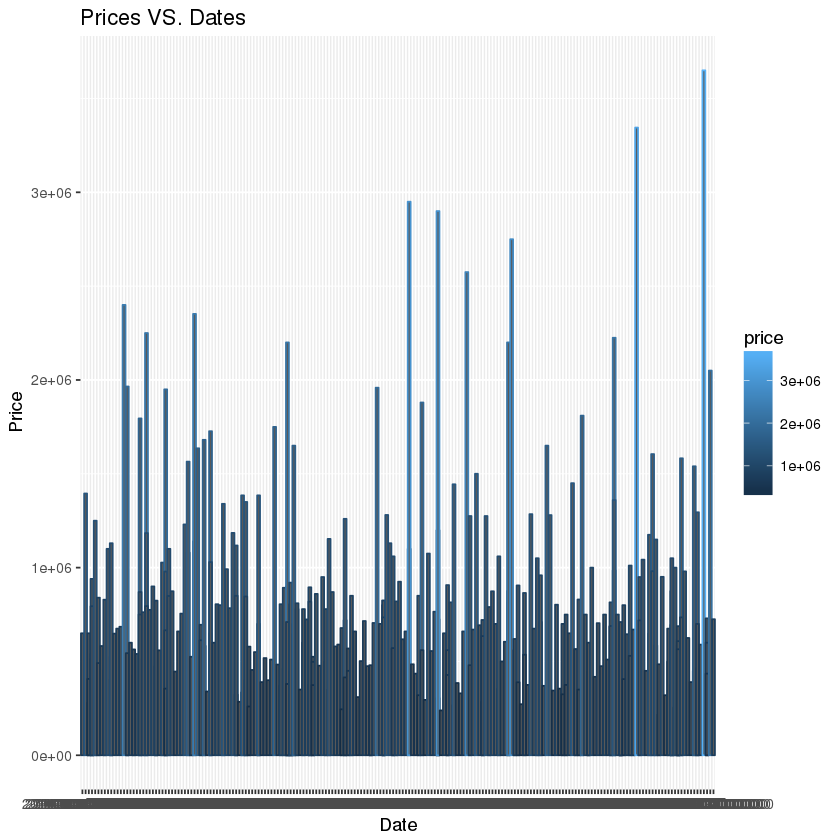

In [3]:
# Add and edit code below to improve the 
#   visualization of the desired data.
# ----------------------------------------------------
# ggplot(one, 
#  aes(x=date, y=price, fill=price)) +  
#  geom_bar(position='dodge', stat='identity')
#

# edit this plot, until you get a discernible result
# Good Axis, better presentation of data and labels.

p1 <- ggplot(one, aes(date, price, group=factor(Country.Name))) + 
    geom_point(aes(color=factor(Country.Name))) + 
    scale_x_discrete(breaks=c(seq(1960,2020,by=10))) + ylim(30,80) 




ggplot(one, aes(x=date, y=price, color=price)) +  
    geom_bar(position='dodge', stat='identity') + 
    ggtitle("Prices VS. Dates") + 
    xlab("Date") + ylab("Price")

# Histograms_and_Heatmaps_Lab

In [4]:
library(ggplot2)
mvt_data=read.csv("~/datasets/mvt.csv")


In [5]:
#Set up what we need for the lab

# The format specified should match the input date format to extract respective information.
mvt_data$Date=strptime(mvt_data$Date,format="%m/%d/%y %H:%M")
# To find out the day of week, use weekdays()
mvt_data$Day = weekdays(mvt_data$Date)
# mvt_data$Date$hour will extract the hour from Date
mvt_data$Hour = mvt_data$Date$hour
mvt_data$Day = factor(mvt_data$Day,ordered=TRUE,
                      levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))
DayHourCounts = as.data.frame(table(mvt_data$Day,mvt_data$Hour))
DayHourCounts$Hour = as.numeric(as.character(DayHourCounts$Var2))
DayHourCounts$Var1 = factor(DayHourCounts$Var1,ordered=TRUE,
                            levels=c("Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"))


## <span style="background:yellow">Your Turn</span>

Consider the data in the plot above.
We see peak in the 8am - 9am time frame.  

Answer and elaborate on these questions in the box below:

  * Do you feel this data spike at 8-9am is an accurate reflection of when cars are being stolen in Chicago?
  * Explain, why or why not.


### Possible Answer
This could be due to the times that cars were discovered to be stolen. A large number of cars are stolen at night when the owner is asleep and won't be found stolen until the next morning around 8am or 9am when the owner is trying to go to work.  

## <span style="background:yellow">Your Turn</span>

 1. Convert the plot above to use _Hour-of-Day_ as the trends.
 2. Then render the trends as points, not lines.


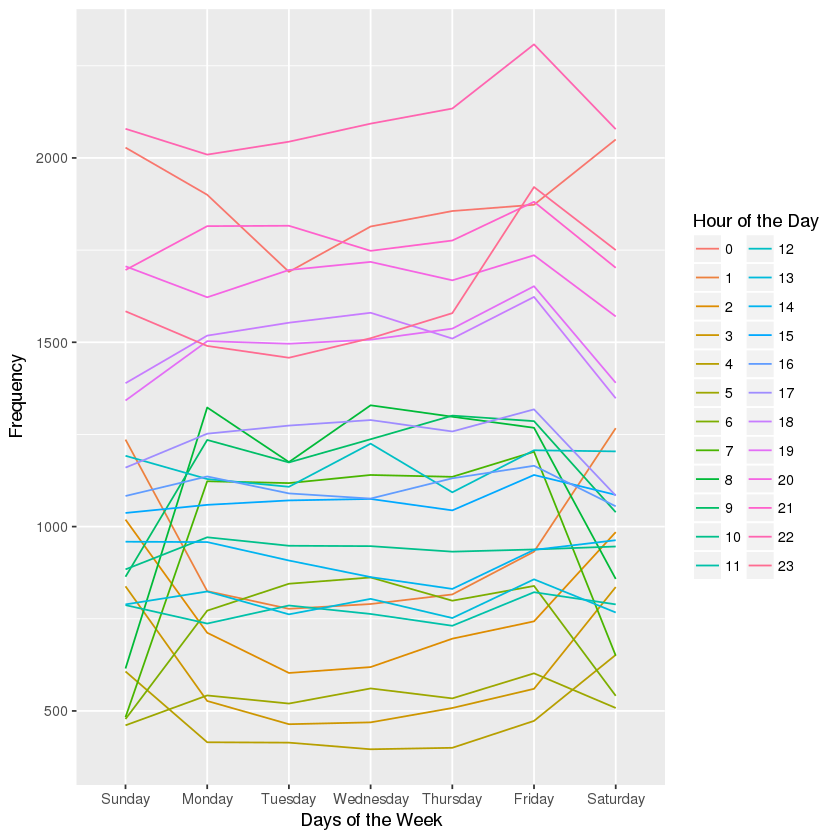

In [6]:
ggplot(DayHourCounts,aes(x=Var1,y=Freq))+
   geom_line(aes(group=Var2,color=Var2)) +
    xlab("Days of the Week") + ylab("Frequency") +
    labs(color = "Hour of the Day")

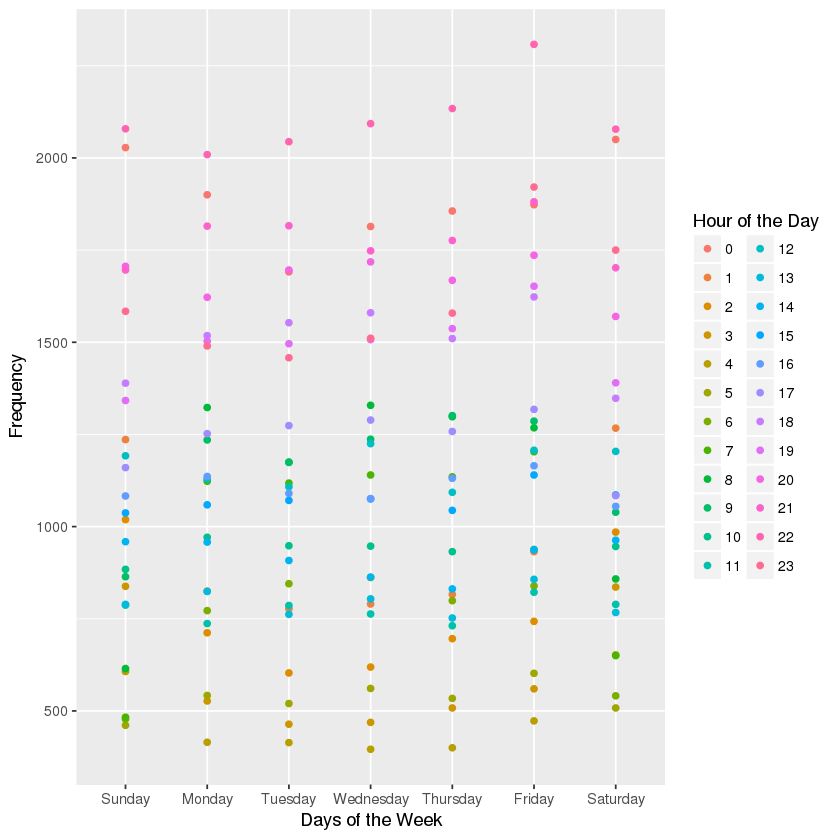

In [7]:
ggplot(DayHourCounts,aes(x=Var1,y=Freq))+
   geom_point(aes(group=Var2,color=Var2)) +
    xlab("Days of the Week") + ylab("Frequency") +
    labs(color = "Hour of the Day")

## <span style="background:yellow">Your Turn</span>

 1. Pivot the heatmap to be _Days-of-Week_ across the bottom, and _Hour-of-Day_ along the side.
 1. Change the plot to be a gray gradient

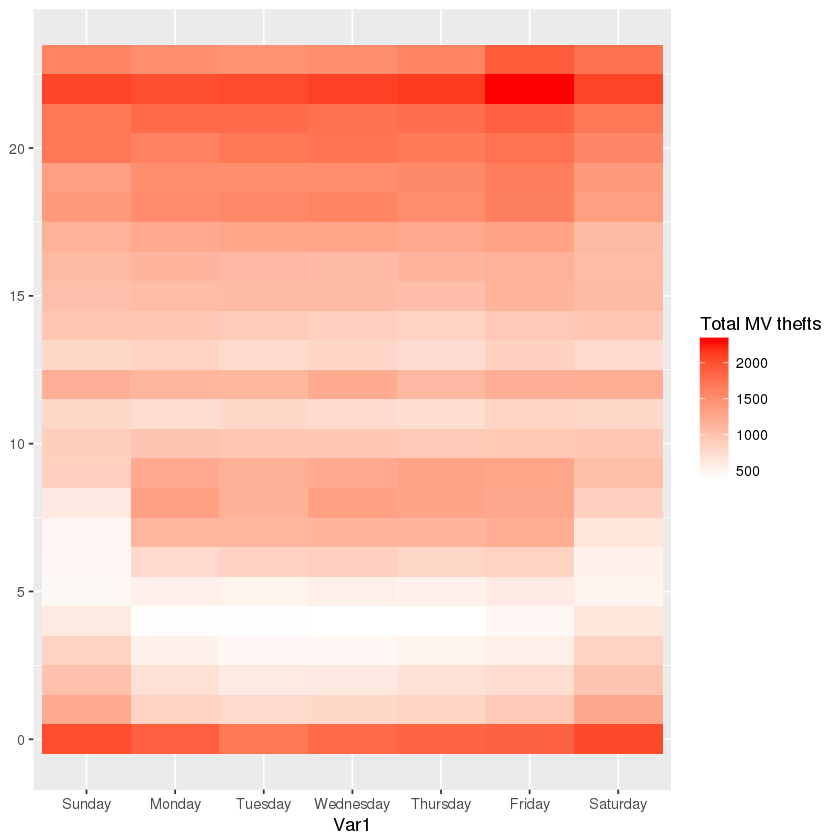

In [8]:
ggplot(DayHourCounts,aes(x=Var1,y=Hour))+
    geom_tile(aes(fill=Freq)) +                 # Using tiles instead of points
    # Note, the we are specifying to fill each tile / rectangle with a gradient from white to red.
    scale_fill_gradient(name="Total MV thefts",low="white",high="red") +
    theme(axis.title.y=element_blank())

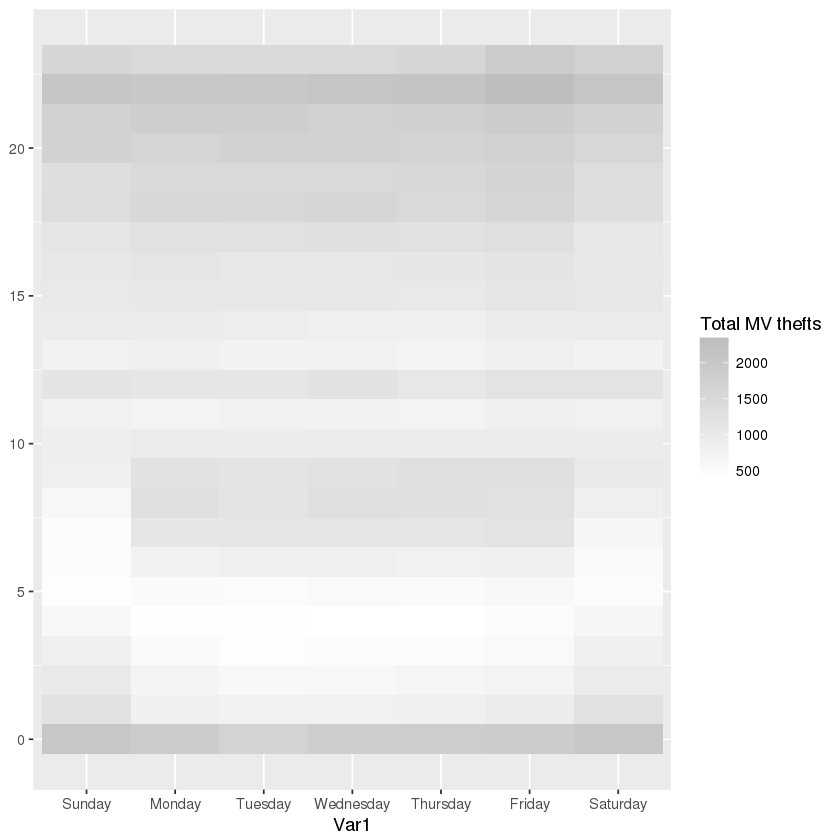

In [9]:
ggplot(DayHourCounts,aes(x=Var1,y=Hour))+
    geom_tile(aes(fill=Freq)) +                 # Using tiles instead of points
    # Note, the we are specifying to fill each tile / rectangle with a gradient from white to red.
    scale_fill_gradient(name="Total MV thefts",low="white",high="grey") +
    theme(axis.title.y=element_blank())

# L4_Histogram

In [10]:
usda_data = read.csv("../../../datasets/USDA.csv")
usda_data=usda_data[!is.na(usda_data$Calories),]

## <span style="background:yellow">Your Turn</span>

#### 1) Change the plot above to weight the histogram by `SaturatedFat`

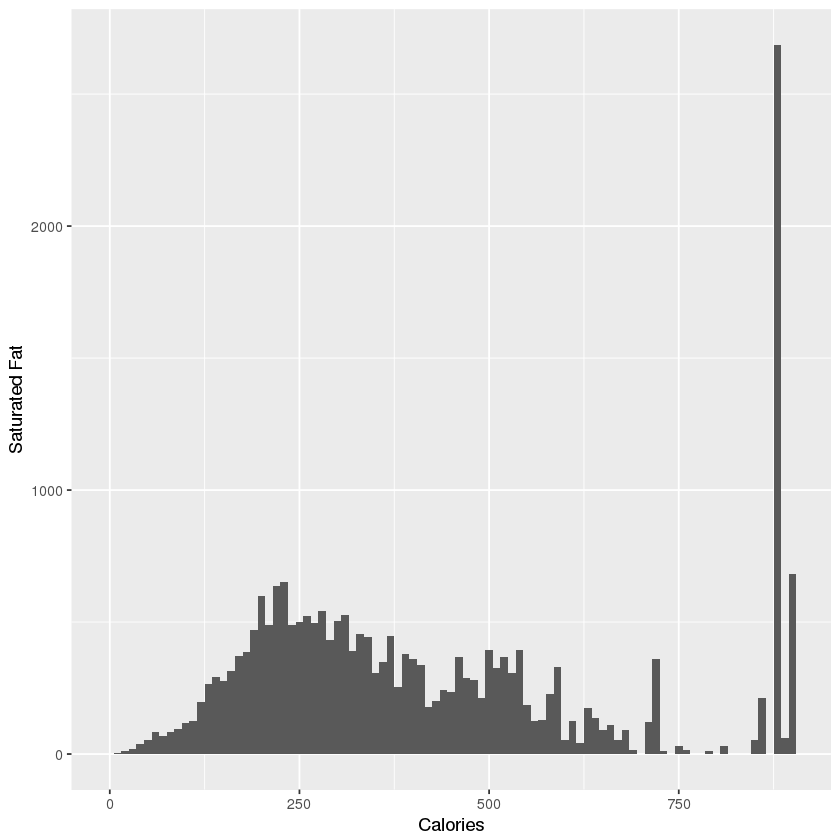

In [11]:
qplot(Calories, data=usda_data, geom="histogram", weight=SaturatedFat, binwidth=10, ylab = "Saturated Fat") 

#### 2) Put the two histograms (protein and fat weighted) onto a grid, then provide a comparable analysis of the distribution of calories in the USDA data.


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



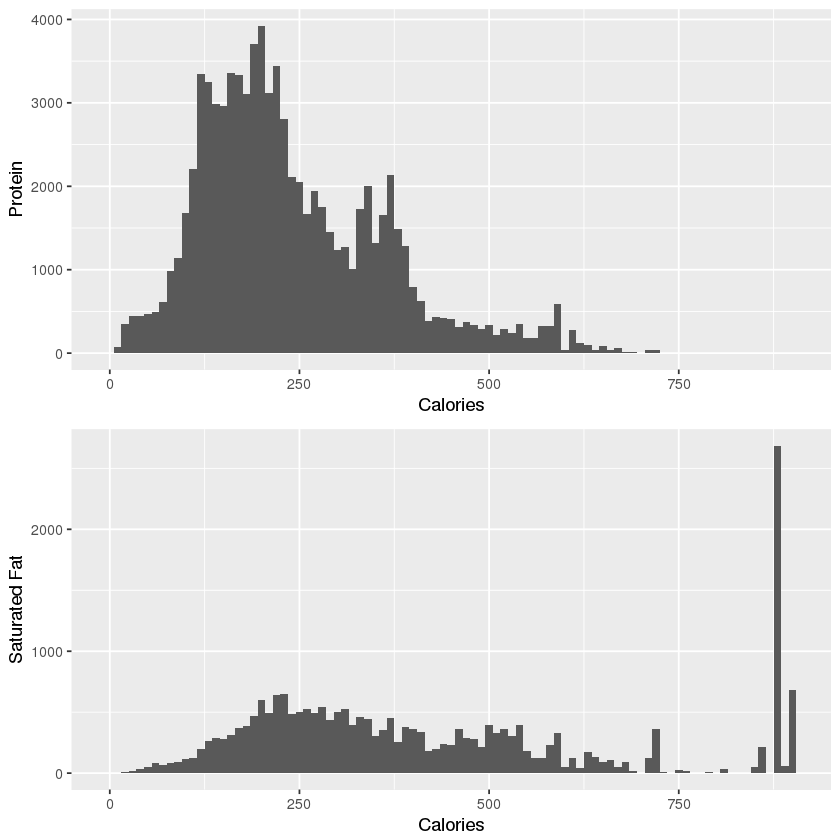

In [12]:
library(gridExtra)
p1 <- qplot(Calories, data=usda_data, geom="histogram", weight=Protein, binwidth=10, ylab = "Protein") 
p2 <- qplot(Calories, data=usda_data, geom="histogram", weight=SaturatedFat, binwidth=10, ylab = "Saturated Fat") 

grid.arrange(p1,p2,ncol=1)

### Possible Answer

The above plots show that the distribution of protien is more concentrated and narrow between 0 and 250 calories while Saterated Fat is a wider disibutions with a very large amount of distributed around 875 calories. 

## <span style="background:yellow">Your Turn</span>

#### 1) Provide a side-by-side density histogram of the Protein weighted calories and the Total Fat weighted calories.


Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
“sum(weights) != 1  -- will not get true density”Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
“sum(weights) != 1  -- will not get true density”

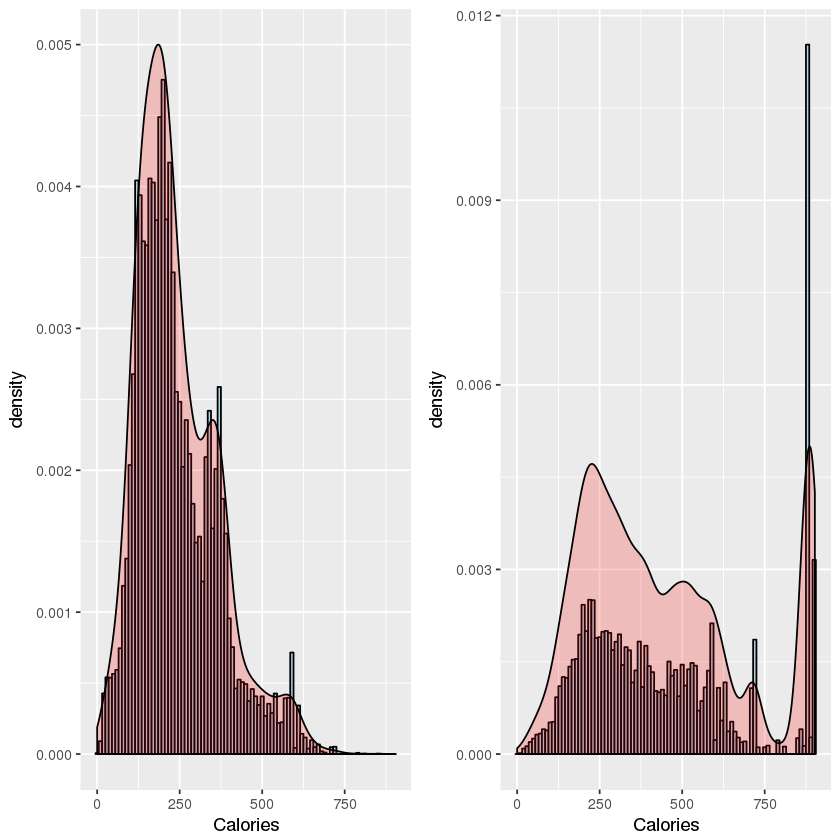

In [42]:

#Distribution for Protein 
p1 <- ggplot(usda_data, aes(x=Calories, weight=Protein)) + 
 geom_histogram(aes(y=..density..),  # this ..density.. is a derived variable, computed during call to geom_histogram()
                color="black", fill="lightblue", binwidth=10) +
 geom_density(aes(y=(..scaled..)/200), alpha=.2, fill="red", ) 

#Distribution Plot for TotalFat
p2 <- ggplot(usda_data, aes(x=Calories, weight=TotalFat)) + 
 geom_histogram(aes(y=..density..),  # this ..density.. is a derived variable, computed during call to geom_histogram()
                color="black", fill="lightblue", binwidth=10) +
 geom_density(aes(y=(..scaled..)/200), alpha=.2, fill="red") 

grid.arrange(p1,p2,ncol=2)

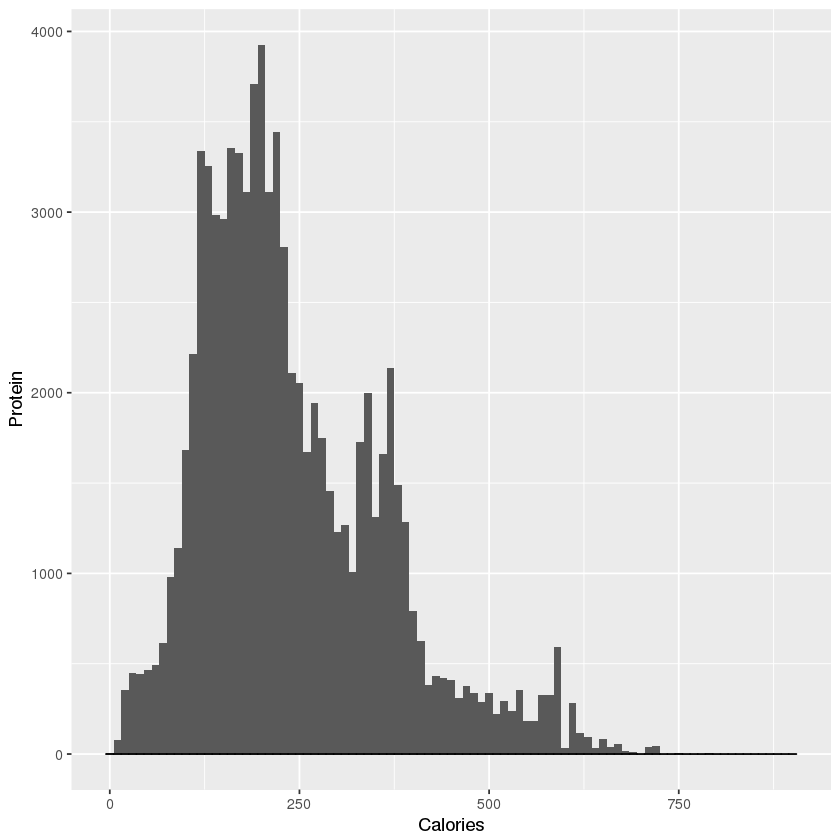

In [28]:
p <- qplot(Calories, data=usda_data, geom="histogram", weight=Protein, binwidth=10, ylab = "Protein") 
p <- p + geom_histogram(aes(y=..density..),  # this ..density.. is a derived variable, computed during call to geom_histogram()
                color="black", fill="lightblue", binwidth=10)
p

# L4_Heatmap

In [14]:
library(ggplot2)
data(diamonds)

## <span style="background:yellow">Your Turn</span>

Please notice that the generate shape and rendering of the statistical plot does not match up with the expectations, visually, based on the previous heatmap with 2-D boxes.

In the cell below, correct the perspective of the above plot.

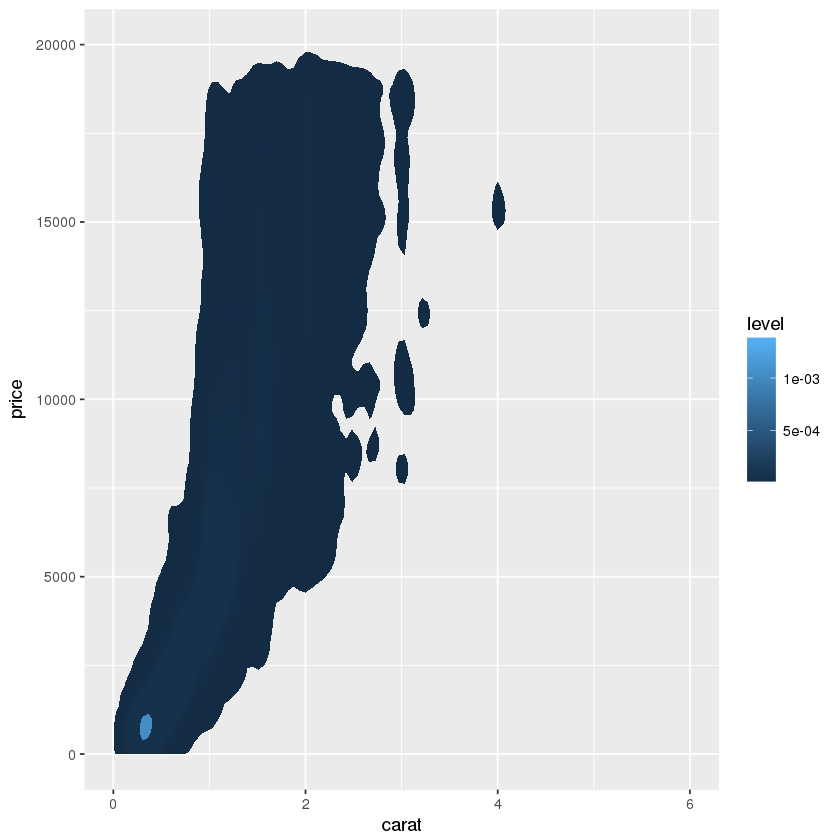

In [15]:
#We need to make sure theres more bins so the smaller amounts of data are picked up.
#  Also lets make sure the axes stay the same.


c <- ggplot(diamonds, aes(carat, price)) +  
    stat_density_2d(aes(fill = ..level..), geom="polygon",bins=10000) +  
    xlim(0,6) + ylim(0,20000)
                                                            
c

## <span style="background:yellow">YOUR TURN</span>

Center the and zoom the map to Mercer Isand, by adjusting the parameters the get_map function.  
Here is the API documentation:

```
get_map(
    location = c(lon = -95.3632715, lat = 29.7632836), 
    zoom = "auto", 
    scale = "auto", 
    maptype = c("terrain", "terrain-background", "satellite", "roadmap", "hybrid", "toner", "watercolor", "terrain-labels", "terrain-lines", "toner-2010", "toner-2011", "toner-background", "toner-hybrid", "toner-labels", "toner-lines", "toner-lite"), 
    source = c("google", "osm", "stamen", "cloudmade"), 
    force = ifelse(source == "google", TRUE, TRUE), 
    messaging = FALSE, 
    urlonly = FALSE, 
    filename = "ggmapTemp", 
    crop = TRUE, 
    color = c("color", "bw"), 
    language = "en-EN", 
    api_key
 )
```

Render the last version of the spatial heatmap, with size of the data point indicating the price of the house and using transparency to approximate heatmap.
Make the points shades of red.

In [16]:
library(ggmap)

#Import the data
kc_house_data = read.csv("~/datasets/house_sales_in_king_county/kc_house_data.csv")

#Using google to find the lat long of Mercer Island
# The Zoom value is an integer between 3 (Country size) to 21 (building size) where 10 is about city size.
kc_map_outline <- get_map(location=c(lon = -122.2221, lat = 47.5707),zoom=13)
kc_map <- ggmap(kc_map_outline)



Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=47.5707,-122.2221&zoom=13&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


ERROR: Error: GeomRasterAnn was built with an incompatible version of ggproto.
Please reinstall the package that provides this extension.


In [ ]:
circle_scale_amt = 0.000002
kc_map <- kc_map + 
    geom_point(data=kc_house_data, 
               aes(x=long, y=lat),col="orange",
               alpha=0.5, 
               size=kc_house_data$price*circle_scale_amt) + 
    scale_size_continuous(range=range(kc_house_data$price)) 

kc_map

# Bubble Charts Lab

In [ ]:
library(ggplot2)
crime = read.csv("../../../datasets/crime.csv")
head(crime)

## <span style="background:yellow">Your Turn</span>

Take note of the visual variables in the plot above.
A key aspect of the the expressive power of Bubble Charts is the integration of multiple measurements and how humans are able to perceive relationships among the data points.

Below, describe some insight the above plot gives you about crime rates.

## <span style="background:yellow">Your Turn</span>

Modify the crime Bubble Chart to discover something you find interesting, expected, or unexpected.

  1. Change around the visual variables, including possibly the measure for X, Y, size, and color.
  1. Below, describe the thing you found in step 1.

In [ ]:
# 1) Write your code below this comment
# -------------------------------------



# and fix the color palette 
p <- ggplot(crime, aes(murder,aggravated_assult,size=population, label=state))
p <- p + geom_point(aes(colour=Robbery)) + geom_text(size=2)
#p <- p + xlab("Motor Vehicle Thefts per 1,000 population") + ylab("Burglaries per 1,000") 
p + scale_color_continuous(low="yellow", high="purple")




In [ ]:
library(datasets)
data(airquality)
head(airquality)
# get only the three months and create a month label variable
aq_trim <- airquality[which(airquality$Month == 7 | airquality$Month == 8 | airquality$Month == 9), ]
aq_trim$Month <- factor(aq_trim$Month, labels = c("July", "August", "September"))

## <span style="background:yellow">Your Turn</span>

Modify the Air Quality Bubble Chart to use the Ozone as the size or color.
Change around the visual variables, including possibly the measure for X, Y, size, and color.

  1. Produce two different visualizations, A) and B)
  1. Compare / Contrast the information conveyed in those two visualiziations.

In [ ]:
# 1.A) Write your code below this comment
# -------------------------------------


pa <- ggplot(aq_trim, aes(x = Temp, y = Wind , size = Ozone, fill = Month)) +
        geom_point(shape = 21) +
        ggtitle("Air Quality in New York by Day") +
        labs(x = "Tempurature", y = "Wind") +
        scale_x_continuous(breaks = seq(1, 31, 5))
pa



In [ ]:
# 1.B) Write your code below this comment
# -------------------------------------

pa <- ggplot(aq_trim, aes(x = Day , y = Solar.R , size = Ozone, fill = Month)) +
        geom_point(shape = 21) +
        ggtitle("Air Quality in New York by Day") +
        labs(x = "Day of the month") +
        scale_x_continuous(breaks = seq(1, 31, 5))
pa

